In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> stats_model_training func:
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    get_sig_features(data, sig

In [2]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:len(df.columns)]]
df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6731, 22)


,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
6729,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
6730,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [3]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03,6.731000e+03
mean,-4.822897e-17,-2.307535e-17,-9.581364e-17,-1.257867e-15,-1.388810e-17,1.566947e-17,-4.951552e-17,-2.575772e-16,-4.595278e-17,3.876131e-17,1.976002e-17,-4.192124e-17,-4.174237e-14,-5.269889e-18,-1.708127e-16,2.674036e-16
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,-6.761643e+00,-1.172771e+01,-7.884089e+00,-7.624870e+00,-6.555073e+00,-3.488845e+00,-3.342078e+00,-1.134910e+01,-3.925725e+00,-6.073754e+00,-8.577312e+00,-6.042828e+00,-7.283869e+00,-2.539597e+00,-7.411665e+00,-5.396891e+00
25%,1.106817e-02,-5.096090e-01,-3.836185e-01,1.132967e-03,-5.785920e-01,-5.862557e-01,-5.945163e-01,-4.804215e-01,-6.425548e-01,-5.603199e-01,-5.664371e-01,-5.756294e-01,-5.073343e-01,-4.952420e-01,-5.452529e-01,-1.024351e-02
50%,1.106817e-02,1.741574e-02,1.114317e-02,1.132967e-03,6.790974e-03,8.250464e-03,8.606944e-03,-3.725186e-03,-3.633359e-03,7.239493e-03,-1.691060e-02,1.314582e-02,2.707392e-01,1.584671e-02,2.694811e-02,-1.024351e-02
75%,1.106817e-02,5.067959e-01,4.059048e-01,1.132967e-03,5.865989e-01,5.677857e-01,6.117302e-01,4.729711e-01,6.416140e-01,5.747989e-01,5.509334e-01,5.178103e-01,2.707392e-01,5.013810e-01,2.694811e-02,-1.024351e-02
max,6.783779e+00,6.793448e+00,6.327329e+00,8.474469e+00,5.202762e+00,3.505346e+00,3.359292e+00,1.439250e+01,1.210424e+01,6.736872e+00,1.233522e+01,5.396233e+00,3.457431e+00,2.571290e+00,6.893360e+00,6.453734e+00


<AxesSubplot:xlabel='str. acc._dif', ylabel='Count'>

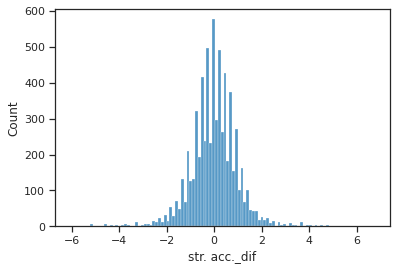

In [4]:
sns.histplot(x=df['str. acc._dif'])

In [5]:
X = df.columns[6:] # prediction model features
data = df.copy()

for feature in X:
    ucl = np.mean(df[feature]) + 3.29*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3.29*np.std(df[feature])
    print('cleaning %s: %s' %(feature,data.shape))
    data = data[(data[feature] < ucl) & (data[feature] > lcl)].reset_index(drop=True)

cleaning kd_dif: (6731, 22)
cleaning str_dif: (6675, 22)
cleaning td_dif: (6613, 22)
cleaning sub_dif: (6546, 22)
cleaning td avg._dif: (6417, 22)
cleaning td acc._dif: (6367, 22)
cleaning td def._dif: (6321, 22)
cleaning sub. avg._dif: (6305, 22)
cleaning slpm_dif: (6232, 22)
cleaning str. acc._dif: (6220, 22)
cleaning sapm_dif: (6149, 22)
cleaning str. def_dif: (6116, 22)
cleaning stance_win_ratio: (6086, 22)
cleaning win_perc_dif: (5960, 22)
cleaning win_strk_dif: (5960, 22)
cleaning lose_strk_dif: (5865, 22)


In [6]:
data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5833,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
5834,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
5835,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [7]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [8]:
data['inlier'] = lof.fit_predict(data[X])
data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,inlier
5833,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,1
5834,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,1
5835,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,1


In [9]:
data = data[data.inlier == 1].reset_index(drop=True)
data = data[data.columns[0:len(data.columns)-1]]
data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5541,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
5542,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
5543,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [10]:
data.to_csv('../data/ufc_data_features_no_outliers.csv', index=None)
print('../data/ufc_data_features_no_outliers.csv saved.')

../data/ufc_data_features_no_outliers.csv saved.
